In [180]:
import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
df = pd.read_csv("books_1.Best_Books_Ever.csv", converters={'genres' : literal_eval, 'genres' : literal_eval, 'awards' : literal_eval})
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,[Locus Award Nominee for Best Young Adult Book...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"[Fantasy, Young Adult, Fiction, Magic, Childre...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,[Bram Stoker Award for Works for Young Readers...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"[Classics, Fiction, Historical Fiction, School...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"[Pulitzer Prize for Fiction (1961), Audie Awar...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"[Classics, Fiction, Romance, Historical Fictio...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"[Young Adult, Fantasy, Romance, Vampires, Fict...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"[Georgia Peach Book Award (2007), Buxtehuder B...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [87]:
df[['title', 'description']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        52478 non-null  object
 1   description  51140 non-null  object
dtypes: object(2)
memory usage: 820.1+ KB


In [88]:
df.dropna(subset = ['title', 'description', "author", "coverImg", "rating", "publishDate", 'numRatings', 'likedPercent'], inplace=True)
df[['title', 'description']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49689 entries, 0 to 52477
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        49689 non-null  object
 1   description  49689 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [89]:
df.drop_duplicates(subset=['title'], inplace = True)
df[['title', 'description']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47244 entries, 0 to 52477
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        47244 non-null  object
 1   description  47244 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [90]:
df['length'] = df['description'].str.len()
df['lengthGenre'] = df['genres'].str.len()

In [91]:
df[['title', 'description', 'length', 'lengthGenre']].head()

,title,description,length,lengthGenre
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,841,10
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,805,10
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,814,10
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,648,10
4,Twilight,About three things I was absolutely positive.\...,341,10


In [92]:
df['length'].describe()

count    47244.000000
mean       865.106977
std        552.214319
min          3.000000
25%        522.000000
50%        794.000000
75%       1091.000000
max      24733.000000
Name: length, dtype: float64

In [93]:
df['lengthGenre'].describe()

count    47244.000000
mean         8.010689
std          3.387871
min          0.000000
25%          7.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: lengthGenre, dtype: float64

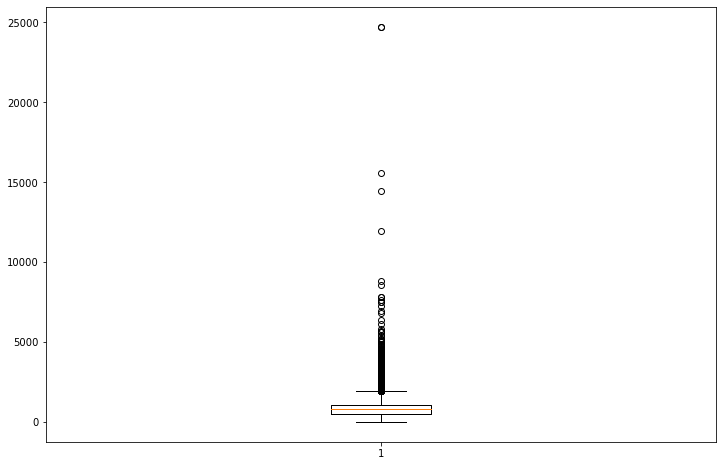

In [94]:
plt.figure(figsize = (12,8))
plt.boxplot(df.length)
plt.title = "Word Count Distribution for book descriptions"
plt.show()

In [95]:
df = df[df.length > 100]

In [96]:
df = df[df.length < 4000]

In [97]:
df = df[df.lengthGenre > 1]

In [98]:
df[['title', 'description', 'length', 'lengthGenre']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41732 entries, 0 to 52477
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        41732 non-null  object
 1   description  41732 non-null  object
 2   length       41732 non-null  int64 
 3   lengthGenre  41732 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.6+ MB


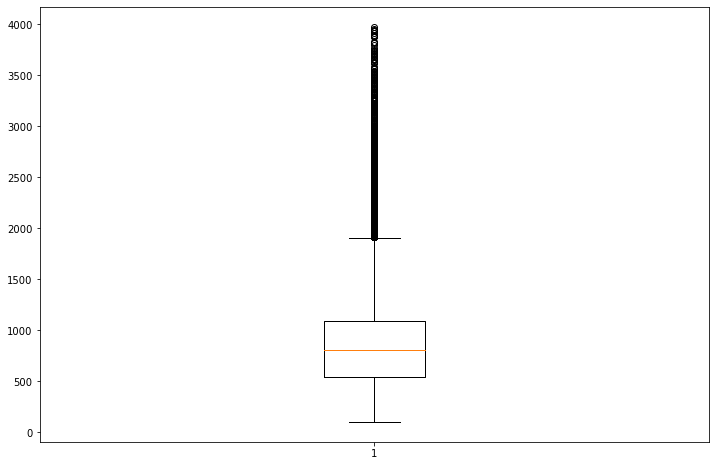

In [99]:
plt.figure(figsize = (12,8))
plt.boxplot(df.length)
plt.title = "Word Count Distribution for book descriptions"
plt.show()

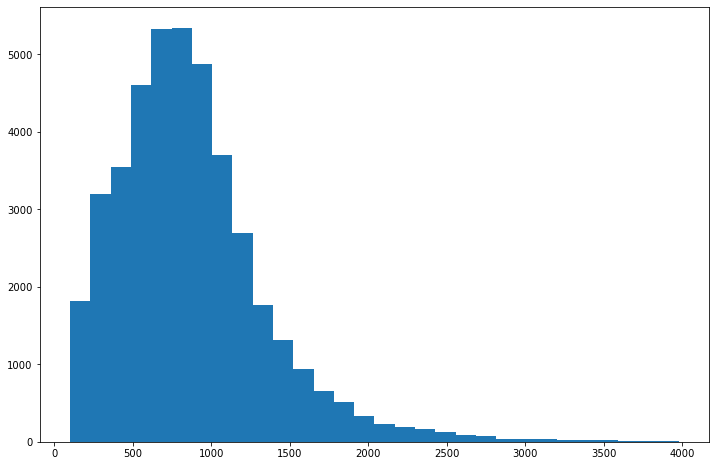

In [100]:
plt.figure(figsize = (12, 8))
plt.hist(df.length, bins = 30)
plt.show()

## Cleaning the book descriptions.

In [101]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['description'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

## Recommendation based on book description

In [17]:
#data_pre = data_pre.head(30000)

In [102]:
df[['title', 'description', 'cleaned_desc']].head()

,title,description,cleaned_desc
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,winning means fame fortune losing means certai...
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,door end silent corridor haunting harry pottte...
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,alternate cover edition isbn 9780679783268sinc...
4,Twilight,About three things I was absolutely positive.\...,three things absolutely positive first edward ...


In [19]:
#data_pre.set_index('title', inplace = True)

In [103]:
# instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(df['cleaned_desc'])

# generating the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [168]:
df = df.reset_index(drop = True)
df

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,length,lengthGenre,cleaned_desc
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09,841,10,winning means fame fortune losing means certai...
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"[Fantasy, Young Adult, Fiction, Magic, Childre...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38,805,10,door end silent corridor haunting harry pottte...
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"[Classics, Fiction, Historical Fiction, School...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN,814,10,unforgettable novel childhood sleepy southern ...
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"[Classics, Fiction, Romance, Historical Fictio...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN,648,10,alternate cover edition isbn 9780679783268sinc...
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"[Young Adult, Fantasy, Romance, Vampires, Fict...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1,341,10,three things absolutely positive first edward ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41727,33852466-nameless-fate,Nameless Fate,Fated Mate #1,Stephanie West (Goodreads Author),3.93,Harper might get an uncanny gut feeling every ...,English,B01N229SV0,"[Aliens, Science Fiction, Romance, Erotica, BD...",[],...,"['182', '181', '91', '36', '18']",89.0,[],https://i.gr-assets.com/images/S/compressed.ph...,1,1,NaN,1924,10,harper might get uncanny gut feeling every the...
41728,270435.Heal_Your_Body,Heal Your Body: The Mental Causes for Physical...,NaN,Louise L. Hay,4.36,Heal Your Body is a fresh and easy step-by-ste...,English,9780937611357,"[Self Help, Health, Nonfiction, Spirituality, ...",[],...,"['8640', '3745', '1864', '418', '201']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,1,1,4.56,236,10,heal body fresh easy step by step guide look s...
41729,11115191-attracted-to-fire,Attracted to Fire,NaN,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,9781414348643,"[Christian Fiction, Christian, Suspense, Roman...",[],...,"['945', '716', '365', '78', '39']",95.0,['West Texas (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.55,794,10,special agent meghan connors dream o

In [169]:
indices = pd.Series(df.title)
indices

0                                         The Hunger Games
1                Harry Potter and the Order of the Phoenix
2                                    To Kill a Mockingbird
3                                      Pride and Prejudice
4                                                 Twilight
                               ...                        
41727                                        Nameless Fate
41728    Heal Your Body: The Mental Causes for Physical...
41729                                    Attracted to Fire
41730                                              Anasazi
41731                                  Daughter of Helaman
Name: title, Length: 41732, dtype: object

In [170]:
indices[indices == 'My Way: The Way of the White Clouds'].index[0]

33367

In [171]:
#  defining the function that takes in book title as input and returns the top 10 recommended movies
def recommend(title, cosine_sim = cosine_sim):
    
    # initializing the empty list of recommended movies
    recommended_books = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_books.append(list(df.title)[i])
        
    return recommended_books

In [172]:
recommend("The Hunger Games")

['SAMPLER ONLY: Catching Fire (The Hunger Games, #2)',
 'The Hunger But Mainly Death Games: A Parody',
 'J. D. Robb 10 Books Death Series Collection Set',
 'Death',
 'Mockingjay',
 'Guide to The Hunger Games',
 'The Hunger Games Tribute Guide',
 'Catching Fire',
 'Death: The High Cost of Living',
 'The Quillan Games']

In [173]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price', 'length', 'lengthGenre',
       'cleaned_desc'],
      dtype='object')

In [174]:
use_df = df[['title', 'series', 'author', 'rating', 'description', 'language',  'genres', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'numRatings', 'likedPercent', 'coverImg']]
use_df.head()

,title,series,author,rating,description,language,genres,bookFormat,edition,pages,publisher,publishDate,numRatings,likedPercent,coverImg
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Hardcover,First Edition,374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"[Classics, Fiction, Historical Fiction, School...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"[Classics, Fiction, Romance, Historical Fictio...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...


In [175]:
use_df.count()

title           41732
series          20152
author          41732
rating          41732
description     41732
language        39696
genres          41732
bookFormat      41153
edition          3928
pages           40832
publisher       40028
publishDate     41732
numRatings      41732
likedPercent    41732
coverImg        41732
dtype: int64

In [176]:
use_df['recommendations'] = use_df.apply(
    lambda row: recommend(row.title), axis = 1)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_35544/2819054275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['recommendations'] = use_df.apply(


In [177]:
use_df

,title,series,author,rating,description,language,genres,bookFormat,edition,pages,publisher,publishDate,numRatings,likedPercent,coverImg,recommendations
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Hardcover,First Edition,374,Scholastic Press,09/14/08,6376780,96.0,https://i.gr-assets.com/images/S/compressed.ph...,[SAMPLER ONLY: Catching Fire (The Hunger Games...
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,2507623,98.0,https://i.gr-assets.com/images/S/compressed.ph...,"[Harry Potter and the Prisoner of Azkaban, Har..."
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"[Classics, Fiction, Historical Fiction, School...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,4501075,95.0,https://i.gr-assets.com/images/S/compressed.ph...,"[Go Set a Watchman, Caught Up in Her, Laughing..."
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"[Classics, Fiction, Romance, Historical Fictio...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,2998241,94.0,https://i.gr-assets.com/images/S/compressed.ph...,[Mr. Darcy Presents His Bride: A Sequel to Jan...
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Paperback,NaN,501,"Little, Brown and Company",09/06/06,4964519,78.0,https://i.gr-assets.com/images/S/compressed.ph...,"[Twilight Watch, Works of Love, Vampire Box Se..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41727,Nameless Fate,Fated Mate #1,Stephanie West (Goodreads Author),3.93,Harper might get an uncanny gut feeling every ...,English,"[Aliens, Science Fiction, Romance, Erotica, BD...",Kindle Edition,NaN,445,NaN,January 12th 2017,508,89.0,https://i.gr-assets.com/images/S/compressed.ph...,"[Rebel Belle, My Forever, Red Lily, Stealing H..."
41728,Heal Your Body: The Mental Causes for Physical...,NaN,Louise L. Hay,4.36,Heal Your Body is a fresh and easy step-by-ste...,English,"[Self Help, Health, Nonfiction, Spirituality, ...",Paperback,NaN,96,Hay House,January 1st 1984,14868,96.0,https://i.gr-assets.com/images/S/compressed.ph...,[The Revive Cafe Cookbook: Delicious and Easy ...
41729,Attracted to Fire,NaN,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,"[Christian Fiction, Christian, Suspense, Roman...",Paperback,NaN,416,Tyndale House Publishers,October 1st 2011,2143,95.0,https://i.gr-assets.com/images/S/compressed.ph...,"[Winter's Passage, The Iron Legends, Freeze Ta..."
41730,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,"[Mystery, Young Adult]",Paperback,First Edition,190,Bokheim Publishing,August 5th 2011,37,95.0,https://i.gr-assets.com/images/S/compressed.ph...,"[The Risk, Normal, Agent 21, Facing Your Giant..."


In [185]:
use_df.replace(np.nan, "", inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [186]:
use_df.to_json('books.json', orient='records', lines=True)

In [187]:
recommend("Harry Potter and the Sorcerer's Stone")

['Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Chamber of Secrets',
 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
 'Only Time Will Tell',
 'The Magical Worlds Of Harry Potter: A Treasury Of Myths, Legends And Fascinating Facts',
 'The Harry Potter Collection 1-4',
 'Harry Potter: Film Wizardry',
 'Who Is J.K. Rowling?',
 'Harry Potter and the Half-Blood Prince',
 'The End of Harry Potter?']